>> ### Correlation between news and stock movement for GOOG

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')

>>> #### Load data

In [2]:
stockData = pd.read_csv("./data/yfinance_data/GOOG_historical_data.csv")
newsData = pd.read_csv('./data/raw_analyst_ratings.csv')

In [3]:
newsData.head(10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [4]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401,0.0,0.0
6,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132,0.0,0.0
7,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967,0.0,0.0
8,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037,0.0,0.0
9,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.494053,183633734,0.0,0.0


>>#### Normalize and Align Dates

In [5]:
from scripts.newsStockCorrelation import normalize_dates
newsData, stockData = normalize_dates(newsData, stockData)

>> #### Perform Sentiment Analysis

In [6]:
from scripts.newsStockCorrelation import analyze_sentiment
newsData = analyze_sentiment(newsData)

In [12]:
newsData.head(10)

,unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,0.00


>> #### Aggregate Sentiments by Date

In [7]:
from scripts.newsStockCorrelation import aggregate_sentiments
sentimentData = aggregate_sentiments(newsData)

In [13]:
sentimentData.head(10)

,date,sentiment
0,2009-02-14 00:00:00+00:00,0.000000
1,2009-04-27 00:00:00+00:00,0.000000
2,2009-04-29 00:00:00+00:00,0.000000
3,2009-05-22 00:00:00+00:00,0.000000
4,2009-05-27 00:00:00+00:00,0.234091
5,2009-05-29 00:00:00+00:00,0.068182
6,2009-05-30 00:00:00+00:00,0.118182
7,2009-06-01 00:00:00+00:00,0.000000
8,2009-06-02 00:00:00+00:00,0.000000
9,2009-06-05 00:00:00+00:00,0.083333


>> #### Calculate Daily Stock Returns

In [8]:
from scripts.newsStockCorrelation import calculate_stock_returns
stockData = calculate_stock_returns(stockData)

In [14]:
stockData.head(10)

,date,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2004-08-19 00:00:00+00:00,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN
1,2004-08-20 00:00:00+00:00,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,7.942989
2,2004-08-23 00:00:00+00:00,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,1.006362
3,2004-08-24 00:00:00+00:00,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,-4.140766
4,2004-08-25 00:00:00+00:00,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,1.077510
5,2004-08-26 00:00:00+00:00,2.613952,2.688672,2.606729,2.687676,2.684621,142572401,0.0,0.0,1.801895
6,2004-08-27 00:00:00+00:00,2.692408,2.705360,2.632383,2.643840,2.640835,124826132,0.0,0.0,-1.630996
7,2004-08-30 00:00:00+00:00,2.622171,2.627402,2.540727,2.540727,2.537839,104429967,0.0,0.0,-3.900129
8,2004-08-31 00:00:00+00:00,2.547950,2.583068,2.544463,2.549693,2.546795,98825037,0.0,0.0,0.352899
9,2004-09-01 00:00:00+00:00,2.557912,2.564637,2.482445,2.496891,2.494053,183633734,0.0,0.0,-2.070919


>> #### Merge Datasets

In [9]:
from scripts.newsStockCorrelation import merge_datasets
mergedData = merge_datasets(sentimentData, stockData)

In [15]:
mergedData.head(10)

,date,sentiment,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2009-04-27 00:00:00+00:00,0.000000,9.572619,9.700889,9.533018,9.612719,9.601792,91967429,0.0,0.0,-0.908886
1,2009-04-29 00:00:00+00:00,0.000000,9.613217,9.837377,9.609730,9.750204,9.739121,144941247,0.0,0.0,2.022370
2,2009-05-22 00:00:00+00:00,0.000000,9.879469,9.929034,9.763404,9.800764,9.789624,69001669,0.0,0.0,-0.756625
3,2009-05-27 00:00:00+00:00,0.234091,10.103131,10.258050,10.082458,10.101138,10.089657,121826932,0.0,0.0,0.296767
4,2009-05-29 00:00:00+00:00,0.068182,10.264277,10.391799,10.229159,10.391799,10.379987,106325044,0.0,0.0,1.664223
5,2009-06-01 00:00:00+00:00,0.000000,10.429159,10.699894,10.424178,10.624178,10.612102,133394127,0.0,0.0,2.236176
6,2009-06-02 00:00:00+00:00,0.000000,10.616457,10.708861,10.545473,10.670006,10.657878,105337356,0.0,0.0,0.431354
7,2009-06-05 00:00:00+00:00,0.083333,11.085200,11.141738,10.945474,11.066520,11.053941,147783862,0.0,0.0,0.917601
8,2009-06-08 00:00:00+00:00,0.218182,10.946470,10.981837,10.812472,10.928288,10.915867,124412588,0.0,0.0,-1.249094
9,2009-06-09 00:00:00+00:00,0.000000,10.923556,10.971377,10.753693,10.849832,10.837499,130684007,0.0,0.0,-0.717925


>> #### Correlation Analysis

In [10]:
from scripts.newsStockCorrelation import correlation_analysis

correlation, p_value = correlation_analysis(mergedData)
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: 0.02, P-value: 0.3125


>> #### Visualization

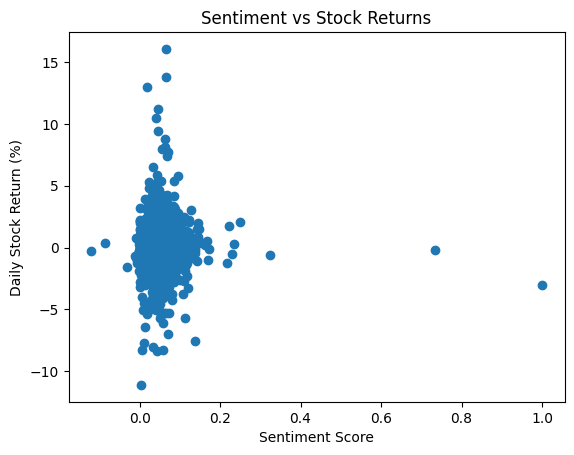

In [11]:
from scripts.newsStockCorrelation import plot_correlation

plot_correlation(mergedData)